#pip install sec-edgar-downloader pandas openpyxl beautifulsoup4 lxml

Task 1:  Data extraction and initial analysis

In [14]:
# from sec_edgar_downloader import Downloader
# import os
# from bs4 import BeautifulSoup
import pandas as pd
# import re

In [15]:
# # Initialize Downloader
# dl = Downloader("sec_downloads", email_address="nguyenminhnguyet.ftu@gmail.com")

# # Company Ticker Symbols
# companies = {
#     "Microsoft": "MSFT",
#     "Tesla": "TSLA",
#     "Apple": "AAPL"
# }

# # DataFrame to Store Financial Data
# financial_data = []

# # Function to Extract Financial Data
# # Function to Extract Financial Data from TXT Files with Improved Logic
# def extract_financial_data(file_path, company, year):
#     with open(file_path, 'r', encoding='utf-8') as file:
#         content = file.read()

#         # Improved Regular Expressions for TXT Files
#         try:
#             # More Specific Patterns to Match Only Numbers
#             total_revenue = re.search(r"(Total Revenue|Net Sales|Sales|Operating Revenue)[^\d\-]*([-\d,()]+)(?![-\d,])", content, re.IGNORECASE)
#             net_income = re.search(r"(Net Income|Net Earnings|Net Profit)[^\d\-]*([-\d,()]+)(?![-\d,])", content, re.IGNORECASE)
#             total_assets = re.search(r"(Total Assets)[^\d\-]*([-\d,()]+)(?![-\d,])", content, re.IGNORECASE)
#             total_liabilities = re.search(r"(Total Liabilities)[^\d\-]*([-\d,()]+)(?![-\d,])", content, re.IGNORECASE)
#             cash_flow_operating = re.search(r"(Cash Flow from Operating Activities|Net Cash Provided by Operating Activities)[^\d\-]*([-\d,()]+)(?![-\d,])", content, re.IGNORECASE)

#             # Extract and Clean Data
#             total_revenue = total_revenue.group(2).replace(',', '').replace('$', '').replace('(', '-').replace(')', '') if total_revenue else None
#             net_income = net_income.group(2).replace(',', '').replace('$', '').replace('(', '-').replace(')', '') if net_income else None
#             total_assets = total_assets.group(2).replace(',', '').replace('$', '').replace('(', '-').replace(')', '') if total_assets else None
#             total_liabilities = total_liabilities.group(2).replace(',', '').replace('$', '').replace('(', '-').replace(')', '') if total_liabilities else None
#             cash_flow_operating = cash_flow_operating.group(2).replace(',', '').replace('$', '').replace('(', '-').replace(')', '') if cash_flow_operating else None

#             # Debugging: Display Extracted Values
#             print("Debug: Extracted Values -", total_revenue, net_income, total_assets, total_liabilities, cash_flow_operating)

#             # Append Data if All Metrics are Found
#             if all([total_revenue, net_income, total_assets, total_liabilities, cash_flow_operating]):
#                 financial_data.append({
#                     "Company": company,
#                     "Fiscal Year": year,
#                     "Total Revenue": int(total_revenue),
#                     "Net Income": int(net_income),
#                     "Total Assets": int(total_assets),
#                     "Total Liabilities": int(total_liabilities),
#                     "Cash Flow from Operating Activities": int(cash_flow_operating)
#                 })
#                 print(f"Successfully extracted data for {company} - {year}")
#             else:
#                 print(f"Partial data found for {company} - {year}, skipping...")

#         except AttributeError:
#             print(f"Error parsing data for {company} - {year}")


# # Download and Extract Data
# for company, ticker in companies.items():
#     # Download 10-K Filings for the last 3 fiscal years
#     dl.get("10-K", ticker, after="2022-01-01", before="2025-01-01")

#     # Get the list of downloaded files
#     company_folder = f"/Users/minhnguyetnguyen/Documents/project/BCG/sec-edgar-filings/{ticker}/10-K"
    
#     # Debug: Check if the company folder exists
#     print("Processing:", company_folder)
#     if not os.path.exists(company_folder):
#         print(f"No 10-K filings found for {company}. Skipping...")
#         continue
    
#     # Navigate and Extract Year from Accession Number
#     for accession_folder in sorted(os.listdir(company_folder), reverse=True):
#         # Extract the year from the accession number
#         match = re.search(r'-([0-9]{2})-', accession_folder)
#         if match:
#             filing_year = int('20' + match.group(1))
#             # Only process if the filing year is in 2022, 2023, or 2024
#             if filing_year in [2022, 2023, 2024]:
#                 filing_folder = os.path.join(company_folder, accession_folder)
#                 print(f"Processing Filing for Year: {filing_year} - Folder: {filing_folder}")
#                 for file in os.listdir(filing_folder):
#                     if file.endswith('.txt'):
#                         file_path = os.path.join(filing_folder, file)
#                         extract_financial_data(file_path, company, filing_year)

# # Create DataFrame
# df = pd.DataFrame(financial_data)

# # Debug: Display the DataFrame
# print("Extracted Financial Data:")
# print(df)

# # Export to Excel
# output_file = '/Users/minhnguyetnguyen/Documents/project/BCG/financial_data.xlsx'
# df.to_excel(output_file, index=False)


In [27]:
df = pd.read_csv('Manual_Financial_Data.csv')
df.head()

,Unnamed: 0,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue YoY Change (%),Net Income YoY Change (%),Assets YoY Change (%),Liabilities YoY Change (%),Cash Flow YoY Change (%)
0,8,Apple,2022,365817,94680,351002,287912,104038,NaN,NaN,NaN,NaN,NaN
1,7,Apple,2023,394328,94680,375319,287912,116306,7.79,0.00,6.93,0.00,11.79
2,6,Apple,2024,438554,109156,425028,311134,132400,11.22,15.29,13.24,8.07,13.84
3,2,Microsoft,2022,198270,61271,333779,191791,76674,NaN,NaN,NaN,NaN,NaN
4,1,Microsoft,2023,241791,72738,364840,191791,89421,21.95,18.72,9.31,0.00,16.62


In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

df.fillna(0, inplace=True)
# Calculate year-over-year percentage changes for each financial metric
df['Revenue YoY Change (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income YoY Change (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets YoY Change (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities YoY Change (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow YoY Change (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

# Round the percentage changes to 2 decimal places
df = df.round(2)

# Display the DataFrame to verify calculations
print("Financial Data with YoY Changes:")
df


Financial Data with YoY Changes:


,Unnamed: 0,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue YoY Change (%),Net Income YoY Change (%),Assets YoY Change (%),Liabilities YoY Change (%),Cash Flow YoY Change (%),Revenue Growth (%)
0,8,Apple,2022,365817,94680,351002,287912,104038,NaN,NaN,NaN,NaN,NaN,0.00
1,7,Apple,2023,394328,94680,375319,287912,116306,7.79,0.00,6.93,0.00,11.79,7.79
2,6,Apple,2024,438554,109156,425028,311134,132400,11.22,15.29,13.24,8.07,13.84,11.22
3,2,Microsoft,2022,198270,61271,333779,191791,76674,NaN,NaN,NaN,NaN,NaN,0.00
4,1,Microsoft,2023,241791,72738,364840,191791,89421,21.95,18.72,9.31,0.00,16.62,21.95
5,0,Microsoft,2024,252184,83980,403592,207942,102741,4.30,15.46,10.62,8.42,14.90,4.30
6,5,Tesla,2022,53823,5531,62803,27686,11158,NaN,NaN,NaN,NaN,NaN,0.00
7,4,Tesla,2023,81462,12556,82813,30163,14721,51.35,127.01,31.86,8.95,31.93,51.35
8,3,Tesla,2024,107154,15345,97141,37321,20243,31.54,22.21,17.30,23.73,37.51,31.54


In [39]:
summary = df.groupby('Company').agg({
    'Revenue YoY Change (%)': 'mean',
    'Net Income YoY Change (%)': 'mean'
}).reset_index()
print(summary)

     Company  Revenue YoY Change (%)  Net Income YoY Change (%)
0      Apple                   9.505                      7.645
1  Microsoft                  13.125                     17.090
2      Tesla                  41.445                     74.610


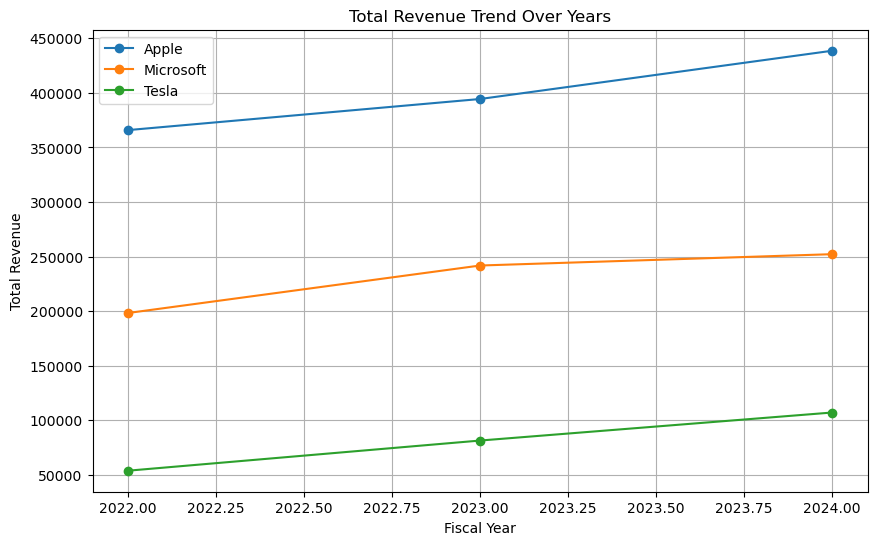

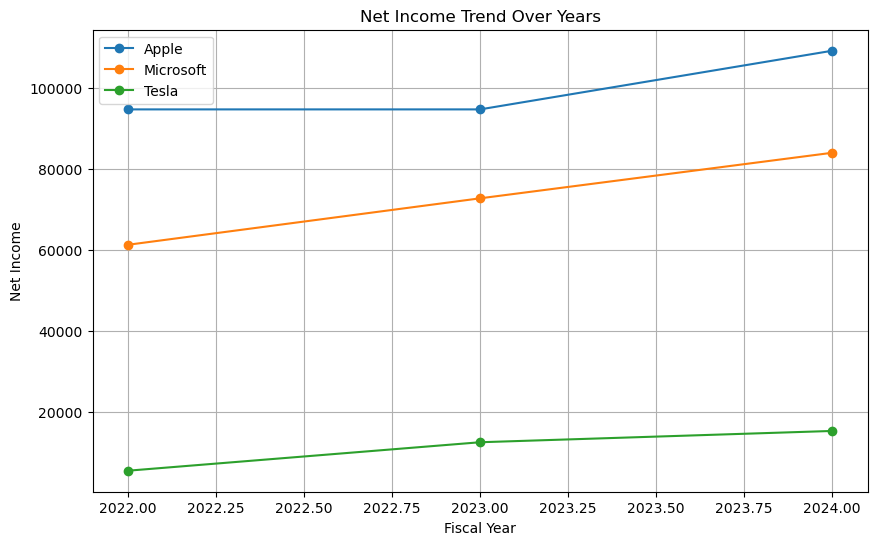

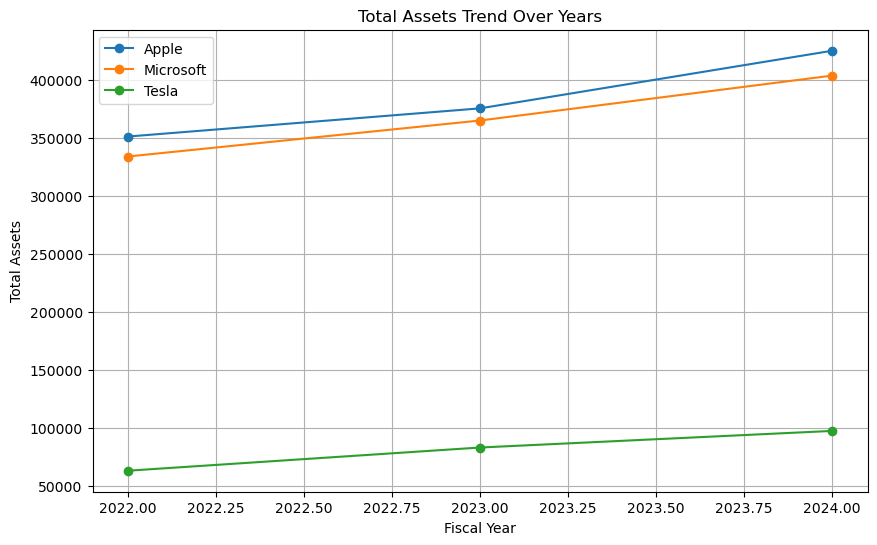

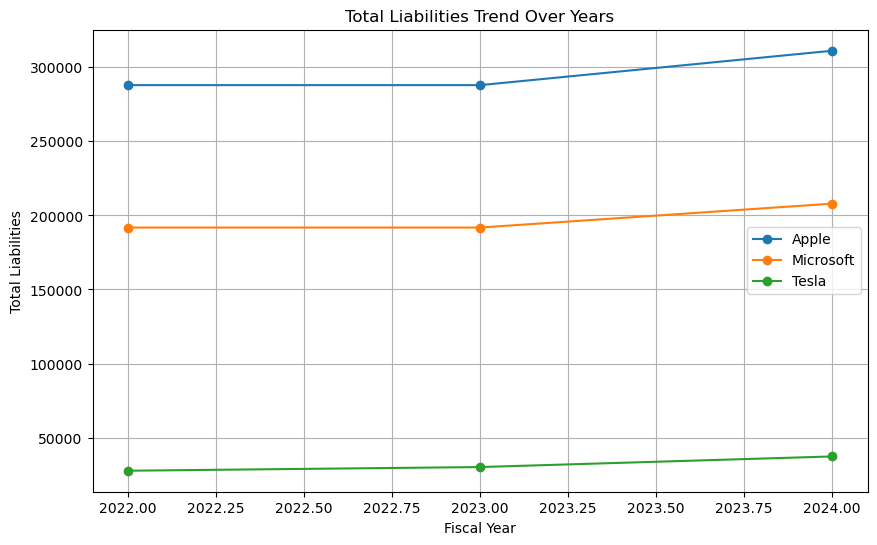

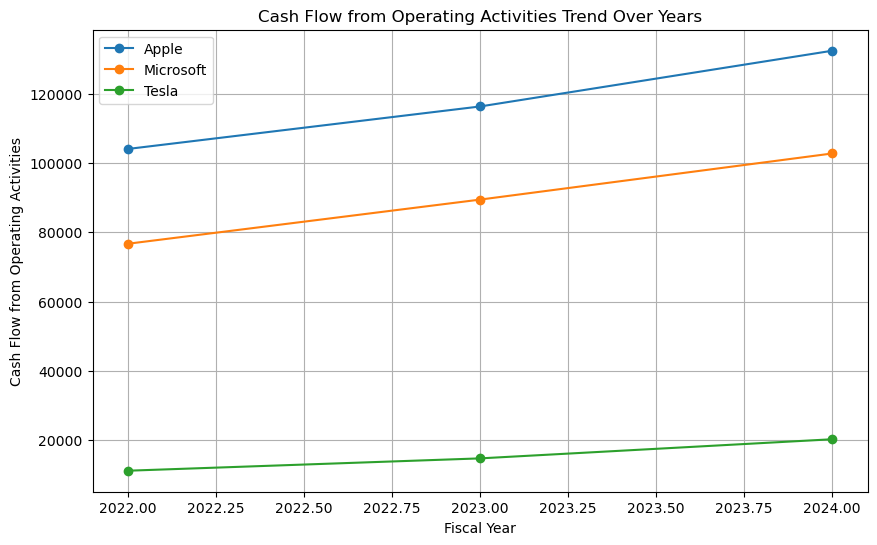

In [33]:
metrics = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities'
]

# Plot trends over years for each company and each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        plt.plot(company_data['Fiscal Year'], company_data[metric], marker='o', label=company)
    
    plt.title(f'{metric} Trend Over Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.show()

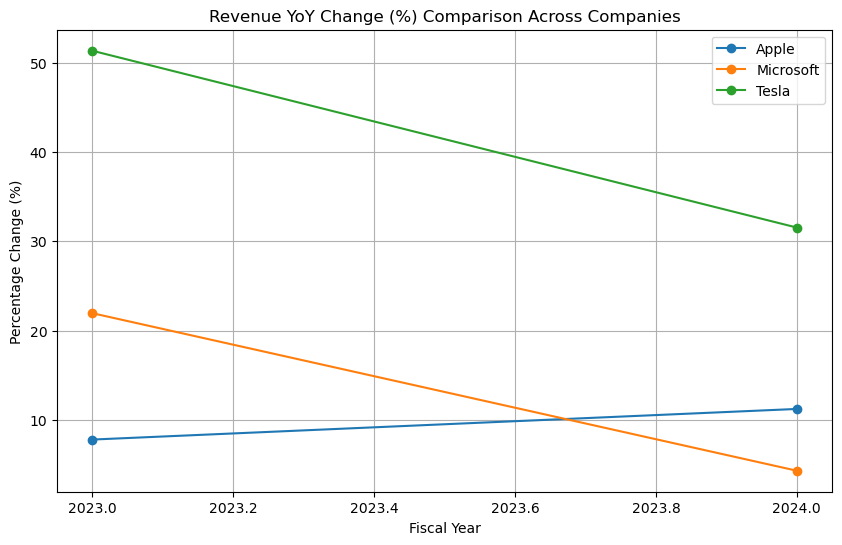

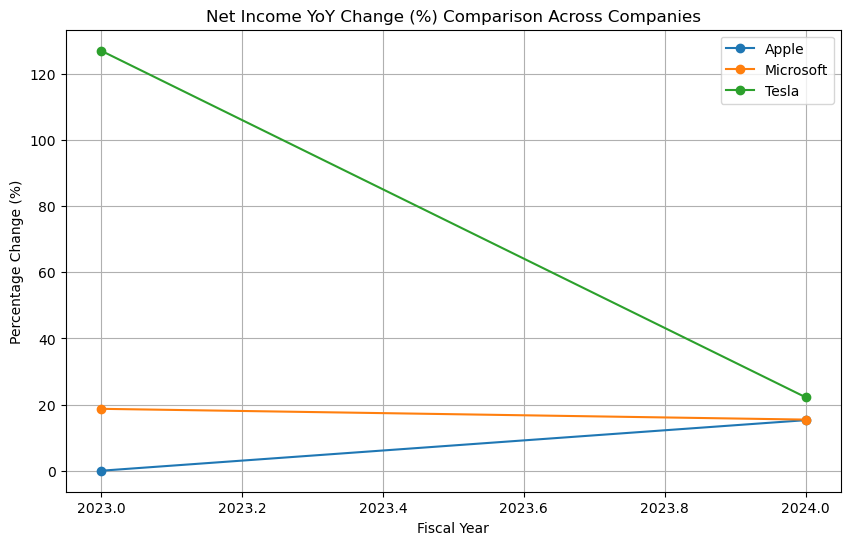

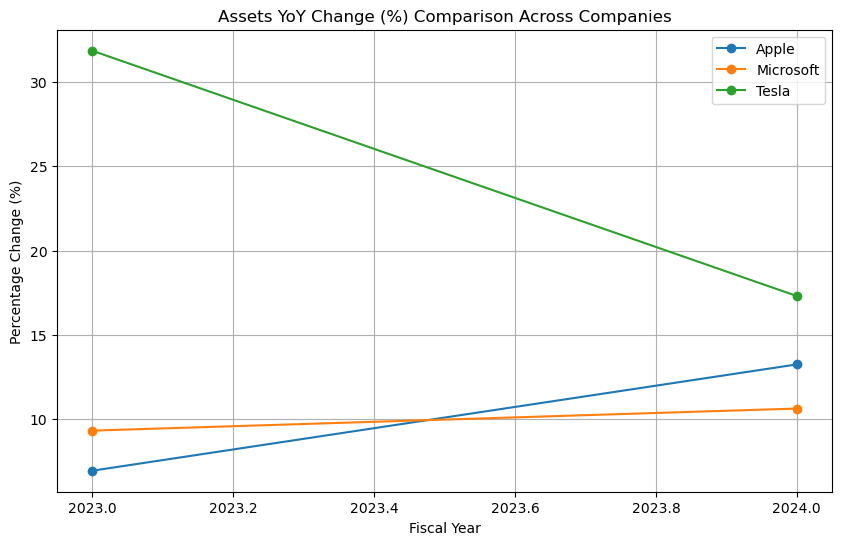

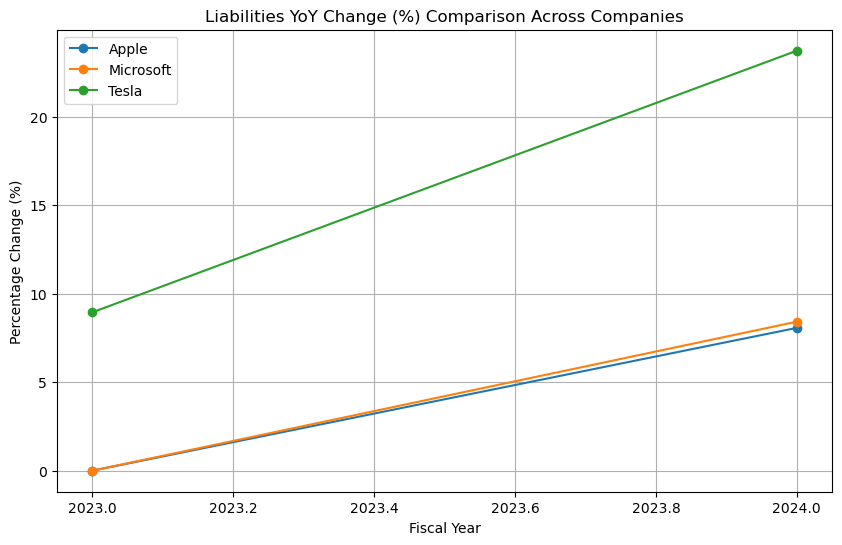

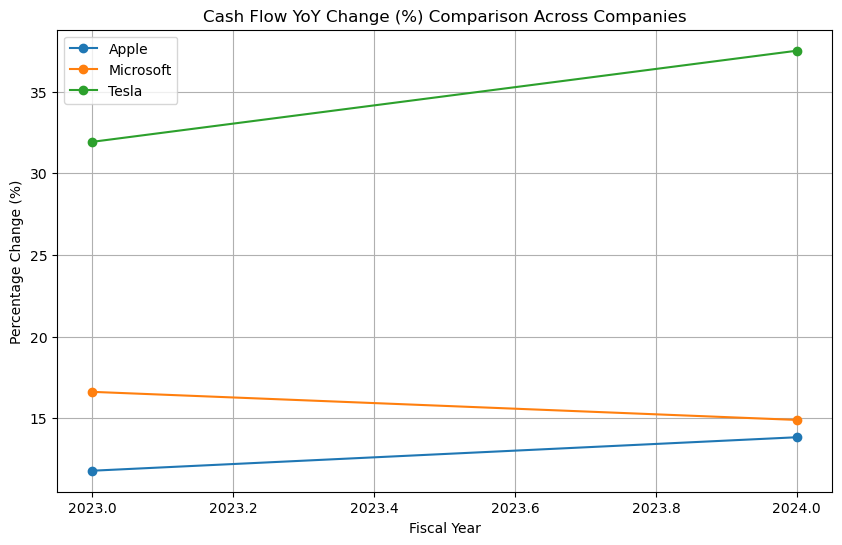

In [35]:
yoy_metrics = [
    'Revenue YoY Change (%)',
    'Net Income YoY Change (%)',
    'Assets YoY Change (%)',
    'Liabilities YoY Change (%)',
    'Cash Flow YoY Change (%)'
]

# Plot comparisons for each YoY metric
for metric in yoy_metrics:
    plt.figure(figsize=(10, 6))
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        plt.plot(company_data['Fiscal Year'], company_data[metric], marker='o', label=company)
    
    plt.title(f'{metric} Comparison Across Companies')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Percentage Change (%)')
    plt.grid(True)
    plt.legend()
    plt.show()


1. Total Revenue and Revenue Growth:

+ Tesla is the fastest-growing in revenue, showcasing its aggressive expansion strategy.
+ Apple has the highest revenue but shows signs of slowing growth.
+ Microsoft maintains a balanced and steady growth trajectory.

2. Net Income

+ Apple and Microsoft demonstrate strong and consistent profitability.
+ Tesla is growing but remains volatile due to high operational costs and investments.

3. Total Assets
+ Apple has the largest asset base
+ Microsoft follows with a consistent asset growth trend.
+ Tesla shows the fastest asset growth, reflecting investments in manufacturing facilities and expansion initiatives.

4. Total Liabilities:
+ Apple has the highest liabilities, mainly due to its strategic debt management and capital structure optimization.
+ Microsoft maintains steady liabilities, reflecting its balanced financial strategy.
+ Tesla shows increasing liabilities, aligning with its growth-phase capital requirements.

5. Cash Flow from Operating Activities:
+ Apple generates the highest operational cash flow
+ Tesla shows the most rapid growth in operational cash flow
+ Microsoft follows with consistent cash flow growth

=> Tesla is the fastest-growing company across most metrics, reflecting its aggressive expansion and high-growth phase.

=> Apple remains the most profitable and cash-rich company, demonstrating market dominance and operational efficiency.

=> Microsoft shows consistent and balanced growth, leveraging its enterprise software and cloud services.